In [0]:
import numpy as np
import pandas as pd

In [129]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=10gCPx9GcCj2sdsPZi80U4R6E-69GBq7H"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')  
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')


10gCPx9GcCj2sdsPZi80U4R6E-69GBq7H


In [0]:
df=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [133]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [0]:
text=df["reviews.text"].str.lower()

In [0]:
from nltk.corpus import stopwords

In [0]:
from string import punctuation

In [137]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_word = list(stopwords.words("english"))+list(punctuation)

In [0]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [140]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stemmer=LancasterStemmer()

In [142]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
final=[]
tagged=[]
for i in range(len(text)):
  wrd=word_tokenize(text[i])
  wrd=[stemmer.stem(t) for t in wrd if t not in stop_word]
  tag = nltk.pos_tag(wrd)
  wrd=" ".join(wrd)
  final.append(wrd)
  tagged.append(tag)
  

In [144]:
tagged[0]

[('thought', 'NN'),
 ('would', 'MD'),
 ('big', 'JJ'),
 ('smal', 'JJ'),
 ('pap', 'NN'),
 ('turn', 'NN'),
 ('lik', 'JJ'),
 ('palm', 'NN'),
 ('think', 'VBP'),
 ('smal', 'JJ'),
 ('read', 'NN'),
 ('...', ':'),
 ('comfort', 'NN'),
 ('regul', 'NN'),
 ('kindl', 'NN'),
 ('would', 'MD'),
 ('definit', 'VB'),
 ('recommend', 'VB'),
 ('paperwhit', 'NN'),
 ('instead', 'RB')]

In [145]:
for i in tagged[2]:
  if i[1].startswith('J'):
    print(i[0])

low
happy


In [0]:
list_of_all_adj=[]
adj_dict ={}
adj_count=[]
for i in tagged:
  adj_dict ={}
  for j in i:
    if j[1].startswith('J'):
      list_of_all_adj.append(j[0])
      if j[0] in adj_dict.keys():
        count=adj_dict[j[0]]
      else:
        count=0
      count=count+1
      adj_dict[j[0]]=count
  adj_count.append(adj_dict)

In [147]:
adj_count

[{'big': 1, 'lik': 1, 'smal': 2},
 {'easy': 1},
 {'happy': 1, 'low': 1},
 {'extrem': 1,
  'fel': 1,
  'giant': 1,
  'good': 1,
  'happy': 1,
  'issu': 1,
  'last': 1,
  'nee': 1,
  'old': 2,
  'pric': 1,
  'real': 2,
  'sal': 1,
  'second': 1,
  'simpl': 1,
  'unb': 1},
 {'bet': 1, 'good': 1, 'high': 1, 'ipad': 1, 'solid': 1},
 {'bas': 1, 'cheap': 1, 'good': 2, 'much': 1},
 {'anywh': 1,
  'awesom': 1,
  'black': 1,
  'crazy': 1,
  'e-books': 1,
  'easy': 1,
  'fre': 1,
  'larg': 1,
  'last': 1,
  'libr': 1,
  'lif': 1,
  'light': 1,
  'onlin': 1,
  'publ': 2,
  'quit': 1,
  'read': 1,
  'straight': 1,
  'thick': 1},
 {'dead': 1},
 {'best': 1, 'new': 1},
 {'expect': 1, 'fast': 1, 'scor': 1},
 {'bright': 1,
  'digit': 1,
  'easy': 1,
  'extrem': 1,
  'ey': 1,
  'good': 1,
  'high': 1,
  'last': 1,
  'lightweight': 1,
  'long': 1,
  'overal': 1,
  'real': 2},
 {'easy': 1, 'real': 1},
 {'good': 1, 'nee': 1, 'read': 1},
 {'easy': 1, 'let': 1},
 {'dict': 1, 'easy': 1, 'gre': 1, 'light': 1, '

In [0]:
new_df=pd.DataFrame(final)

In [149]:
list_of_all_adj

['big',
 'smal',
 'lik',
 'smal',
 'easy',
 'low',
 'happy',
 'happy',
 'sal',
 'real',
 'good',
 'real',
 'old',
 'extrem',
 'giant',
 'nee',
 'pric',
 'unb',
 'simpl',
 'issu',
 'second',
 'old',
 'fel',
 'last',
 'solid',
 'ipad',
 'good',
 'high',
 'bet',
 'much',
 'bas',
 'good',
 'cheap',
 'good',
 'black',
 'quit',
 'larg',
 'crazy',
 'thick',
 'anywh',
 'light',
 'easy',
 'lif',
 'last',
 'awesom',
 'publ',
 'onlin',
 'libr',
 'fre',
 'publ',
 'read',
 'e-books',
 'straight',
 'dead',
 'best',
 'new',
 'expect',
 'scor',
 'fast',
 'real',
 'good',
 'digit',
 'real',
 'lightweight',
 'high',
 'last',
 'long',
 'easy',
 'ey',
 'extrem',
 'bright',
 'overal',
 'easy',
 'real',
 'good',
 'nee',
 'read',
 'let',
 'easy',
 'gre',
 'norm',
 'light',
 'dict',
 'easy',
 'screen',
 'bright',
 'difficult',
 'read',
 'easy',
 'read',
 'good',
 'extern',
 'pdfs',
 'much',
 'whitepap',
 'onlin',
 'bright',
 'lengthy',
 'serv',
 'cal',
 'engl',
 'id',
 'nic',
 'dev',
 'easy',
 'greatest',
 'l

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(list_of_all_adj)) 

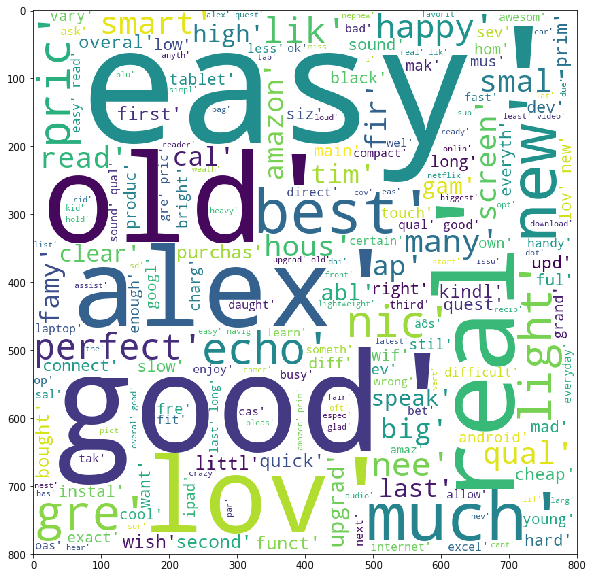

In [152]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

In [0]:
sentence_list=[]
for i in adj_count:
  sentence=""
  for key,value in i.items():
    for count in range(value):
      sentence=sentence+key+" "    
  sentence_list.append(sentence.strip())

In [154]:
sentence_list

['big smal smal lik',
 'easy',
 'low happy',
 'happy sal real real good old old extrem giant nee pric unb simpl issu second fel last',
 'solid ipad good high bet',
 'much bas good good cheap',
 'black quit larg crazy thick anywh light easy lif last awesom publ publ onlin libr fre read e-books straight',
 'dead',
 'best new',
 'expect scor fast',
 'real real good digit lightweight high last long easy ey extrem bright overal',
 'easy real',
 'good nee read',
 'let easy',
 'gre norm light dict easy',
 'screen bright difficult read',
 '',
 'easy read',
 'good',
 'extern pdfs much',
 'whitepap onlin bright lengthy serv cal engl id',
 'nic dev easy greatest light',
 'easy simpl',
 'amazon light easy',
 'lov replac last',
 'distract',
 'abl much',
 'sal',
 'expect dev',
 'lik wish screen high light good easy upd tim lif last less download',
 'fianc√©e real',
 '',
 'mad old',
 'nic touch',
 'glear screen',
 'siz conveny tak digit',
 'pric',
 'sal tot',
 'nev wif dai read strain',
 'much diff t

In [0]:
adj_df=pd.DataFrame(sentence_list)

In [156]:
import nltk
nltk.download('movie_reviews')
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [157]:
blob=TextBlob(str(adj_df.iloc[2000])).sentiment
blob.polarity

0.5

In [0]:
sentiment_list=[]
for i in range(len(adj_df[0])):
  blob=TextBlob(str(adj_df.iloc[i])).sentiment
  sentiment_list.append(blob.polarity)

In [0]:
adj_df["polarity"]=pd.DataFrame(sentiment_list)

In [160]:
adj_df

,0,polarity
0,big smal smal lik,0.000000
1,easy,0.433333
2,low happy,0.400000
3,happy sal real real good old old extrem giant ...,0.416667
4,solid ipad good high bet,0.286667
5,much bas good good cheap,0.500000
6,black quit larg crazy thick anywh light easy l...,-0.046667
7,dead,-0.200000
8,best new,0.568182
9,expect scor fast,0.200000


In [0]:
classify=[]
for i in adj_df["polarity"]:
  if i==0:
    a="Neutral"
  elif i>0:
    a="Positive"
  else:
    a="Negative"
  classify.append(a)

In [0]:
adj_df["classification"]=pd.DataFrame(classify)

In [168]:
adj_df

,0,polarity,classification
0,big smal smal lik,0.000000,Neutral
1,easy,0.433333,Positive
2,low happy,0.400000,Positive
3,happy sal real real good old old extrem giant ...,0.416667,Positive
4,solid ipad good high bet,0.286667,Positive
5,much bas good good cheap,0.500000,Positive
6,black quit larg crazy thick anywh light easy l...,-0.046667,Negative
7,dead,-0.200000,Negative
8,best new,0.568182,Positive
9,expect scor fast,0.200000,Positive


In [0]:
import seaborn as sns

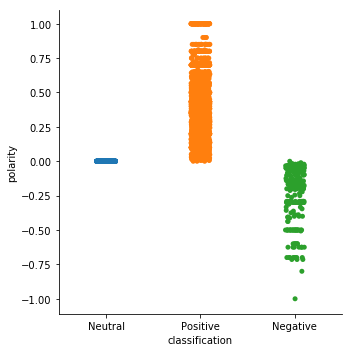

In [171]:
sns.catplot(x="classification", y="polarity", data=adj_df)